# Pregunta 1

**Utilice el WineData de la tarea.**

1.	Divida los datos en un conjunto de entrenamiento y un conjunto de prueba. Use el conjunto de entrenamiento para construir un clasificador. Justifique su elección de ese clasificador en específico.
2.	Evalúe dicho clasificador. Use al menos dos criterios. Explique sus resultados.
3.	Utilice un gráfico para explicar lo que está haciendo el clasificador propuesto en el primer inciso. Explíquelo que se puede aprender con base a dicho gráfico.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Cargar el dataset de vinos
wine_data = pd.read_csv('data/wine.csv')
wine_data.head()

,glucose.area,insulin.area,SSPG,relative.weight,fasting.plasma.glucose,class
0,0.81,80,356,124,55,3
1,0.95,97,289,117,76,3
2,0.94,105,319,143,105,3
3,1.04,90,356,199,108,3
4,1.00,90,323,240,143,3


In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   glucose.area            145 non-null    float64
 1   insulin.area            145 non-null    int64  
 2   SSPG                    145 non-null    int64  
 3   relative.weight         145 non-null    int64  
 4   fasting.plasma.glucose  145 non-null    int64  
 5   class                   145 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 6.9 KB


In [9]:
wine_data.nunique()

glucose.area               45
insulin.area               66
SSPG                      118
relative.weight           114
fasting.plasma.glucose    119
class                       3
dtype: int64

Precisión del modelo LDA: 93.10%


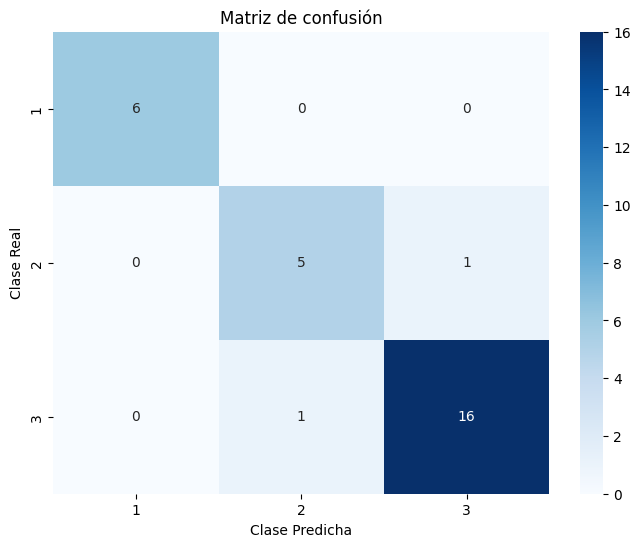

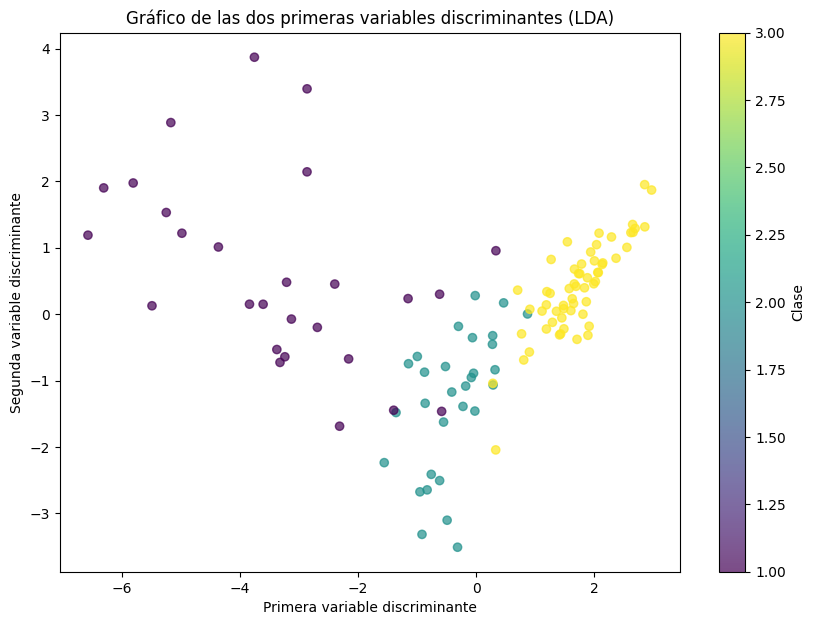

In [21]:
# Separar las características y la variable objetivo
X = wine_data.drop('class', axis=1)
y = wine_data['class']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Crear y ajustar el modelo de Análisis Discriminante Lineal (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = lda.predict(X_test)

# Evaluación: Precisión y Matriz de Confusión
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precisión del modelo LDA: {accuracy * 100:.2f}%')

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.title('Matriz de confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Visualización: Gráfico de las dos primeras variables discriminantes
X_lda = lda.transform(X_train)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('Gráfico de las dos primeras variables discriminantes (LDA)')
plt.xlabel('Primera variable discriminante')
plt.ylabel('Segunda variable discriminante')
plt.colorbar(scatter, label='Clase')
plt.show()

Mejor número de vecinos (k): 4
Precisión del modelo k-NN: 93.10%


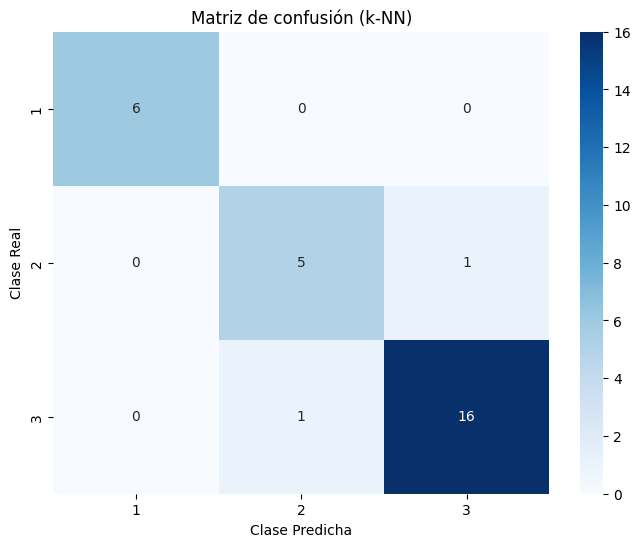

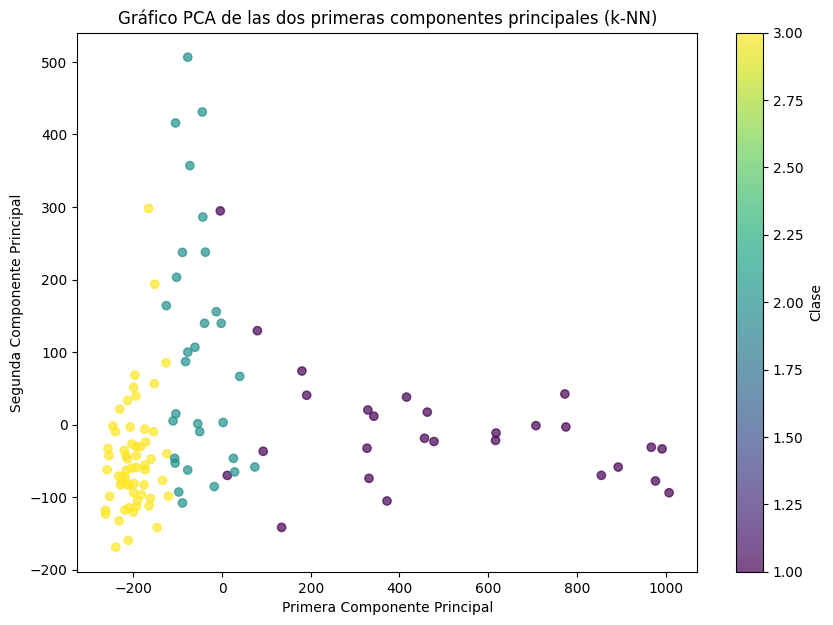

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Crear el modelo k-NN
knn = KNeighborsClassifier()

# Definir un grid de posibles valores de k (número de vecinos)
param_grid = {'n_neighbors': range(1, 21)}

# Utilizar GridSearchCV para encontrar el mejor k
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor número de vecinos encontrado
best_k = grid_search.best_params_['n_neighbors']
print(f'Mejor número de vecinos (k): {best_k}')

# Entrenar el modelo k-NN con el mejor k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_knn = knn_best.predict(X_test)

# Evaluación: Precisión y Matriz de Confusión
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f'Precisión del modelo k-NN: {accuracy_knn * 100:.2f}%')

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=knn_best.classes_, yticklabels=knn_best.classes_)
plt.title('Matriz de confusión (k-NN)')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Visualización: Gráfico de dispersión de las dos primeras variables (aunque no hay variables discriminantes en k-NN)
# Usamos PCA para visualizar los datos en 2D.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 7))
scatter_knn = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('Gráfico PCA de las dos primeras componentes principales (k-NN)')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.colorbar(scatter_knn, label='Clase')
plt.show()


Precisión del modelo de Regresión Logística Multinomial: 100.00%


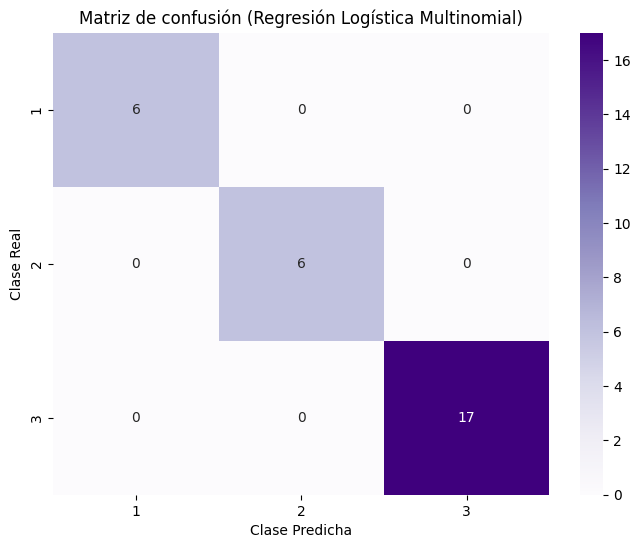

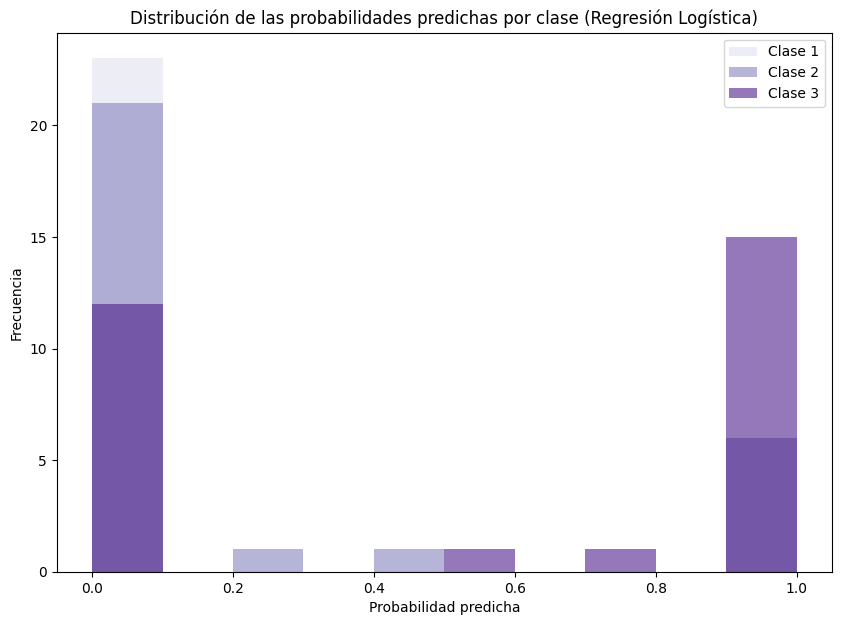

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y ajustar el modelo de Regresión Logística Multinomial
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_log = log_reg.predict(X_test)

# Evaluación: Precisión y Matriz de Confusión
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

print(f'Precisión del modelo de Regresión Logística Multinomial: {accuracy_log * 100:.2f}%')

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Purples", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title('Matriz de confusión (Regresión Logística Multinomial)')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Visualización: Gráfico de las probabilidades de la clase predicha
y_proba = log_reg.predict_proba(X_test)

import matplotlib.cm as cm

# Definir un colormap morado
colors = cm.Purples([0.2, 0.6, 0.9])  # Selecciona diferentes niveles de morado

plt.figure(figsize=(10, 7))
for i, class_label in enumerate(log_reg.classes_):
    plt.hist(y_proba[:, i], bins=10, alpha=0.6, color=colors[i], label=f'Clase {class_label}')
    
plt.title('Distribución de las probabilidades predichas por clase (Regresión Logística)')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()